## SugarSense: Predicting Diabetes Risk

### Import all the required Libraries

In [1]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

### Loading the Dataset and Pre-processing the Data

In [2]:
# mounting to google drive
from google.colab import drive
drive.mount('/content/drive')
#
%cd /content/drive/MyDrive/'Colab Notebooks'/'DATA 606'
!ls

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/DATA 606
'DATA606 - Capstone Project.ipynb'   Diabetes_Dataset.csv


In [3]:
# loading the dataset
df = pd.read_csv("Diabetes_Dataset.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [4]:
# identifying the shape of the data
df.shape

(70692, 22)

In [5]:
# determing the basic info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [6]:
# checking for any null values
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [7]:
# checking for any duplicated values
df.duplicated().sum()

1635

In [8]:
# eliminating and verifying the duplicate values
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [9]:
# determing the shape of the data after removing duplicates
df.shape

(69057, 22)

In [10]:
# determing the number of unique values in each column
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]
pd.DataFrame(unique_values, index=['No.of Unique values']).transpose()

,No.of Unique values
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,80
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [11]:
# standardize the data types
for col in df.columns:
    df[col] = df[col].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69057 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_binary       69057 non-null  int64
 1   HighBP                69057 non-null  int64
 2   HighChol              69057 non-null  int64
 3   CholCheck             69057 non-null  int64
 4   BMI                   69057 non-null  int64
 5   Smoker                69057 non-null  int64
 6   Stroke                69057 non-null  int64
 7   HeartDiseaseorAttack  69057 non-null  int64
 8   PhysActivity          69057 non-null  int64
 9   Fruits                69057 non-null  int64
 10  Veggies               69057 non-null  int64
 11  HvyAlcoholConsump     69057 non-null  int64
 12  AnyHealthcare         69057 non-null  int64
 13  NoDocbcCost           69057 non-null  int64
 14  GenHlth               69057 non-null  int64
 15  MentHlth              69057 non-null  int64
 16  PhysHlth 

In [12]:
# analyzing the statistics of the data
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,...,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000
mean,0.508232,0.571224,0.531329,0.974803,29.955834,0.481935,0.063643,0.150875,0.696483,0.605659,...,0.953908,0.096138,2.863692,3.840103,5.945306,0.258612,0.456464,8.604037,4.900285,5.651332
std,0.499936,0.494905,0.499021,0.156723,7.147972,0.499677,0.244118,0.357930,0.459780,0.488712,...,0.209687,0.294782,1.107950,8.231164,10.139113,0.437875,0.498105,2.858284,1.029338,2.175608
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,1.000000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,3.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### Exploratory Data Analysis (EDA)

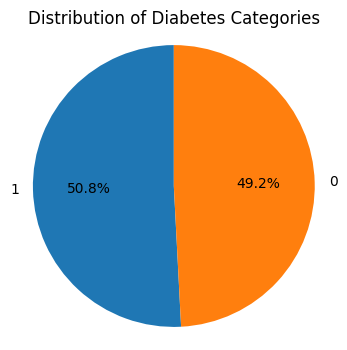

In [13]:
# plotting each category of diabetes
diabetes_counts = df['Diabetes_binary'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Diabetes Categories')
plt.axis('equal')
plt.show()

#### Interpretation:
The graph suggests that the dataset contains a balanced distribution of positive and negative cases of diabetes. This balance ensures a fair analysis for predicting the likelihood of diabetes in individuals.

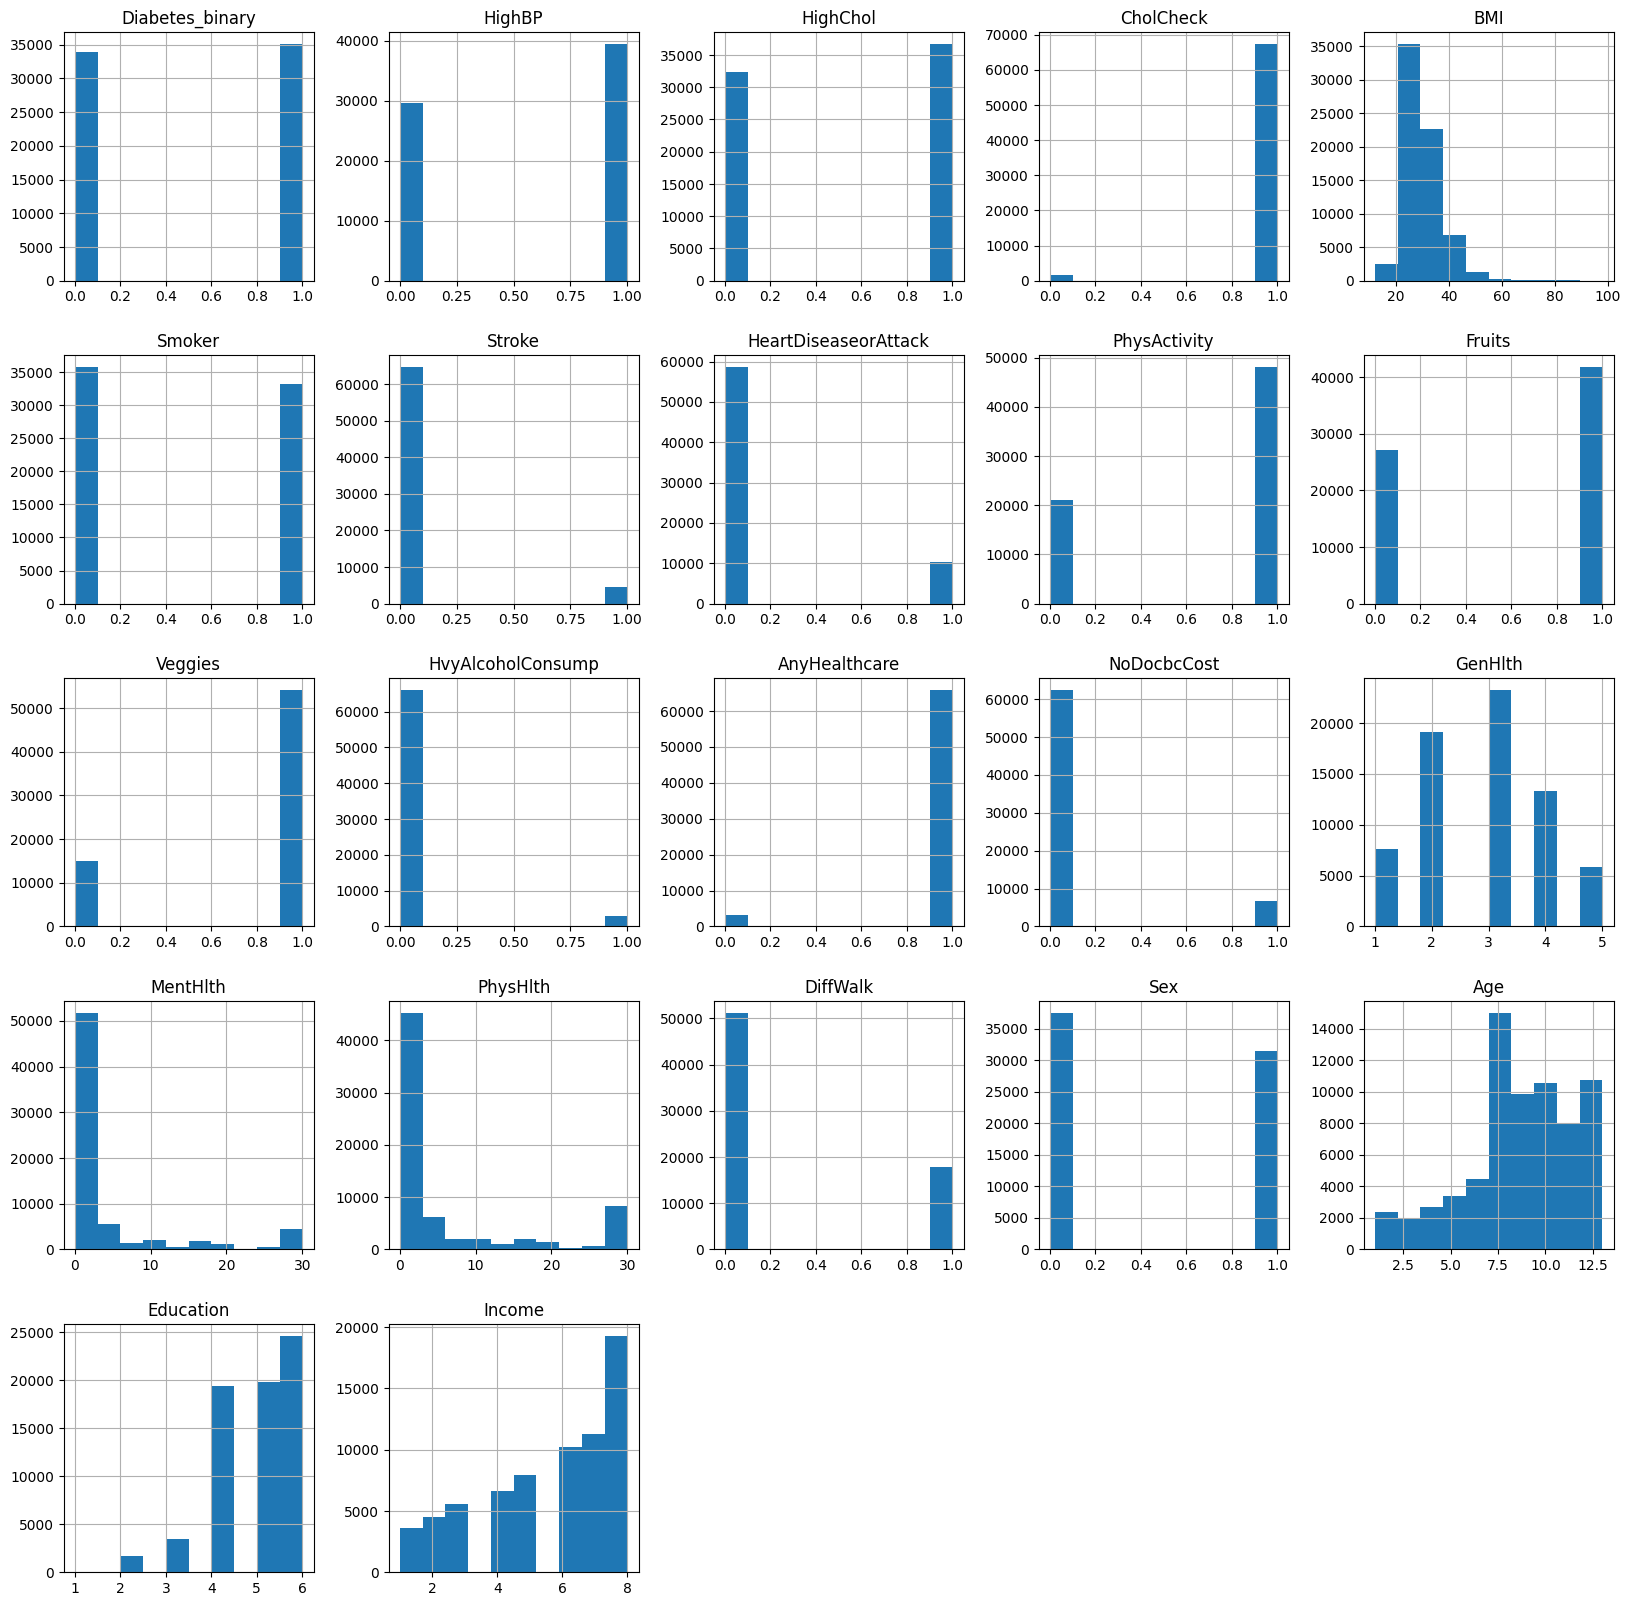

In [14]:
# plotting histogram of all the features
df.hist(figsize=(20, 20))
plt.show()

#### Interpretation:
The histograms visualize the distribution of each feature in the dataset, providing insights into central tendency, spread, and skewness of values. This aids in identifying patterns, outliers, and understanding the data's overall structure. From the above representation it is observed that there are discrete and continuous features.

In [15]:
# determining the dataframe of the diabetes positive
df_positive = df[df['Diabetes_binary'] == 1]

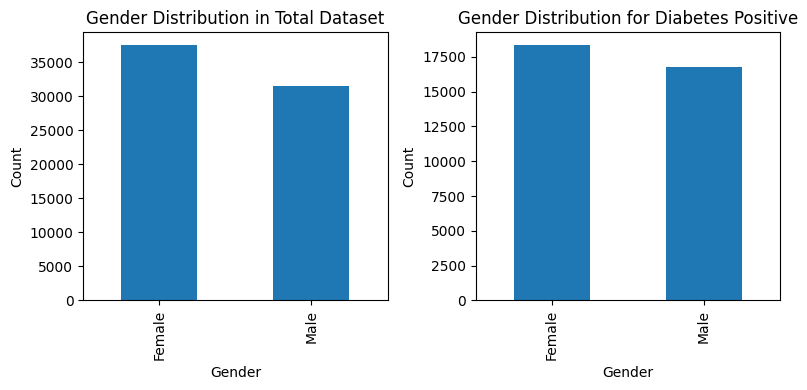

In [16]:
# Total dataset - Gender distribution
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
df['Sex'].map({0: 'Female', 1: 'Male'}).value_counts().plot(kind='bar')
plt.title('Gender Distribution in Total Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')

# Diabetes positive dataset - Gender distribution
plt.subplot(1, 2, 2)
df_positive['Sex'].map({0: 'Female', 1: 'Male'}).value_counts().plot(kind='bar')
plt.title('Gender Distribution for Diabetes Positive')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

#### Interpretation:
The bar chart illustrates the count of individuals diagnosed with diabetes across genders, providing insights into whether gender influences diabetes prevalence. The visualization suggests a slightly higher proportion of women diagnosed with diabetes compared to men, which could be attributed to the slightly higher number of females in the total dataset.

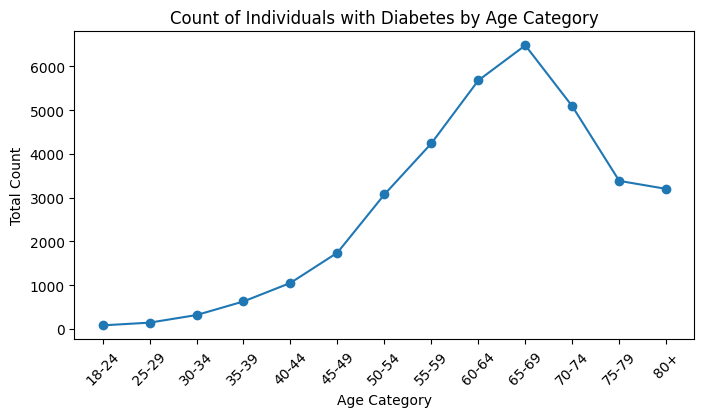

In [17]:
# plotting diabetes_positive based on age
age_counts = df_positive['Age'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
plt.plot(age_counts.index, age_counts.values, marker='o', linestyle='-')
plt.title('Count of Individuals with Diabetes by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Total Count')
plt.xticks(age_counts.index, ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+'], rotation=45)
plt.show()

#### Interpretation:
The line plot illustrates the count of individuals diagnosed with diabetes across different age categories. It is observed that the number of diabetes-positive cases begins to increase notably from the age group of 40-44 years, with a peak in the age range of 60-70 years. This suggests that the likelihood of diabetes tends to rise with advancing age, peaking in the later years of adulthood.

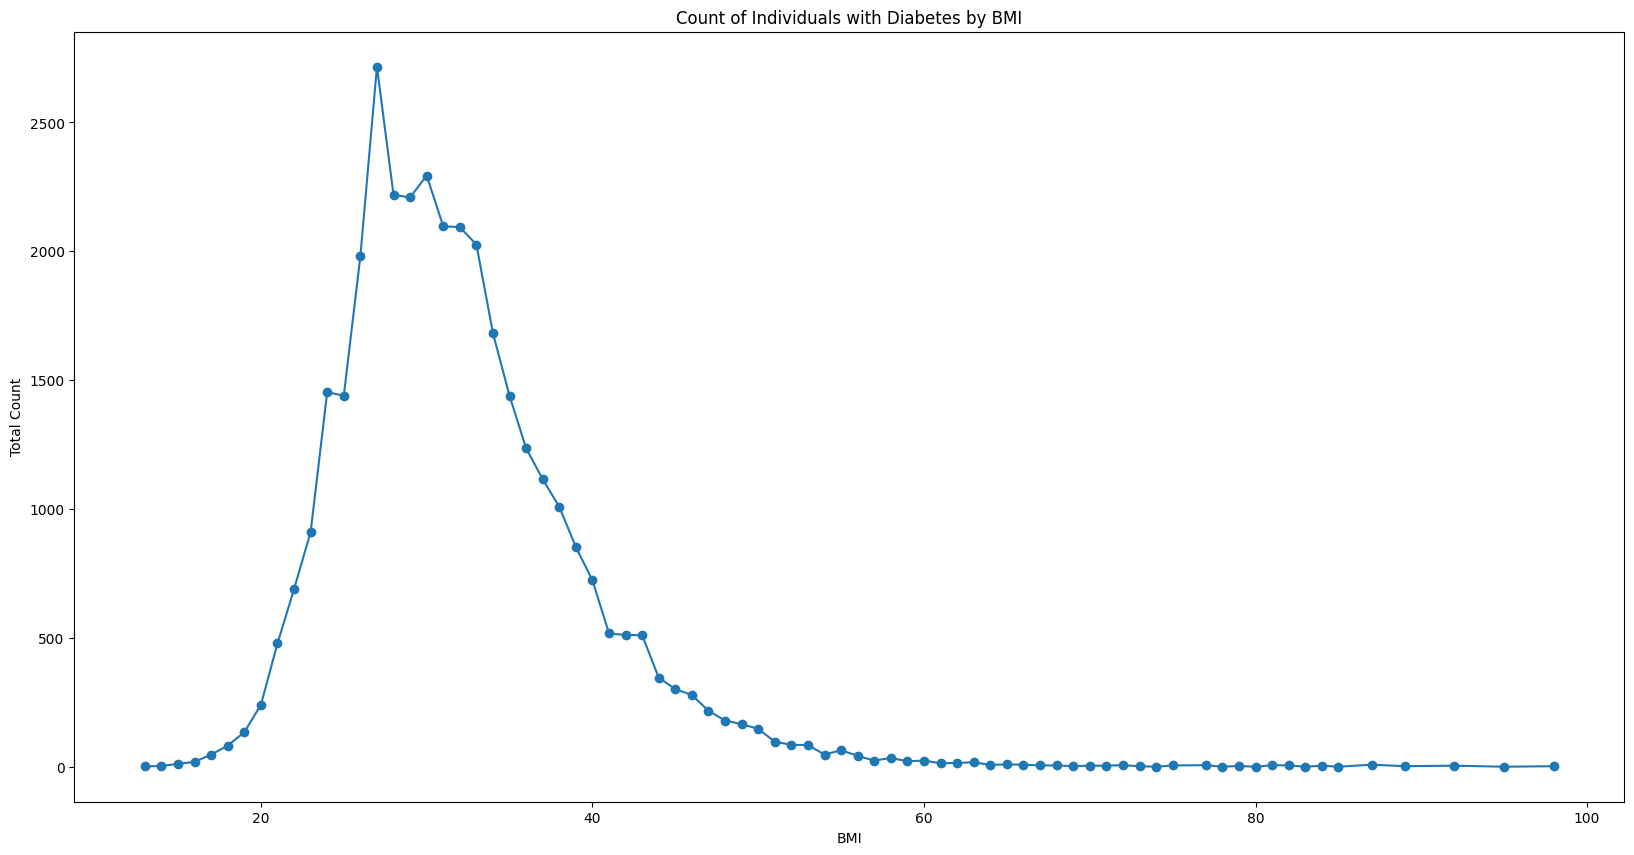

In [18]:
# plotting diabetes_positive based on BMI
bmi_counts = df_positive['BMI'].value_counts().sort_index()
plt.figure(figsize=(20, 10))
plt.plot(bmi_counts.index, bmi_counts.values, marker='o', linestyle='-')
plt.title('Count of Individuals with Diabetes by BMI')
plt.xlabel('BMI')
plt.ylabel('Total Count')
plt.show()

#### Interpretation:
The line plot depicts the count of individuals diagnosed with diabetes across different Body Mass Index (BMI) values. According to BMI categories,

- values below 18.5 indicate underweight
- 18.5 to 24.9 represent a healthy weight
- 25.0 to 29.9 indicate overweight
- 30.0 or higher signify obesity.

From the graph, it's evident that the majority of positive diabetes cases fall within the BMI range of 25 to 40, which corresponds to the overweight category. This suggests a notable association between higher BMI values and an increased likelihood of diabetes.

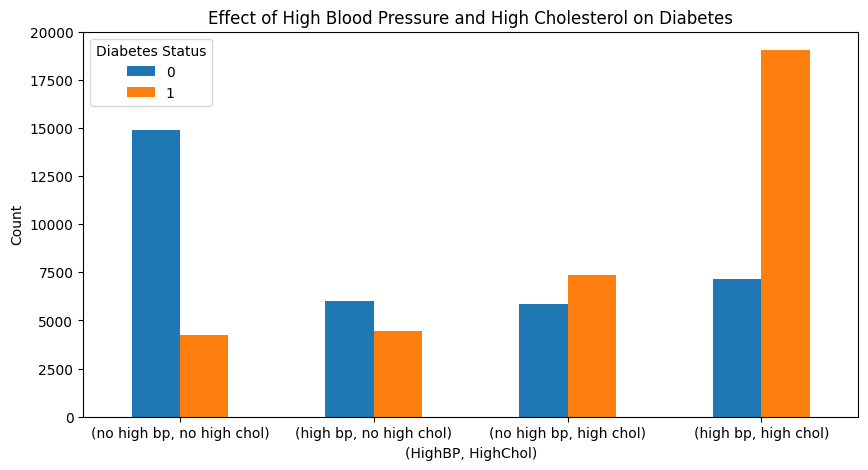

In [19]:
# Plotting diabetes_positive based on high blood pressure and high cholesterol
effect_of_bp_chol = df.groupby(['HighBP', 'HighChol'])['Diabetes_binary'].value_counts().unstack(fill_value=0)
effect_of_bp_chol.plot(kind='bar', figsize=(10, 5), stacked=False)
plt.title('Effect of High Blood Pressure and High Cholesterol on Diabetes')
plt.xlabel('(HighBP, HighChol)')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Customizing x-axis ticks
labels = ['(no high bp, no high chol)', '(high bp, no high chol)', '(no high bp, high chol)', '(high bp, high chol)']
plt.xticks(range(len(labels)), labels)

plt.legend(title='Diabetes Status')
plt.show()

#### Interpretation:
The bar plot illustrates the impact of high blood pressure (HighBP) and high cholesterol (HighChol) on the likelihood of diabetes. Observations indicate that:

- Individuals with neither high blood pressure nor high cholesterol have significantly fewer positive diabetes cases.
- Those with high cholesterol but no high blood pressure show a slightly higher proportion of negative diabetes cases compared to positive cases.
- Conversely, individuals with high blood pressure but no high cholesterol exhibit slightly more positive diabetes cases than negative ones.
- Notably, individuals with both high blood pressure and high cholesterol demonstrate a higher proportion of positive diabetes cases

Overall, the plot suggests that the presence of both high blood pressure and high cholesterol may significantly increase the likelihood of diabetes.

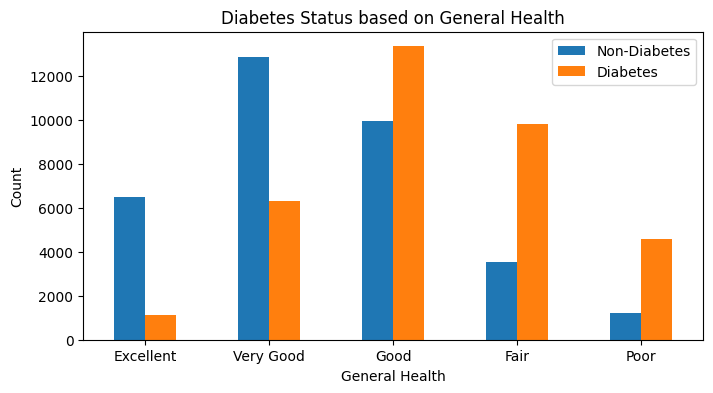

In [20]:
# defining the general health categories and plotting for diabetes based on it
health_labels = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']
grouped = df.groupby(['GenHlth', 'Diabetes_binary']).size().unstack(fill_value=0)
grouped.plot(kind='bar', figsize=(8, 4))
plt.title('Diabetes Status based on General Health')
plt.xlabel('General Health')
plt.ylabel('Count')
plt.xticks(range(len(health_labels)), health_labels, rotation=0)
plt.legend(['Non-Diabetes', 'Diabetes'], loc='upper right')
plt.show()

#### Interpretation:
The bar plot illustrates the distribution of diabetes status based on general health conditions. It reveals a clear trend: as the general health condition deteriorates from excellent to poor, the proportion of individuals with diabetes increases. This trend suggests a strong correlation between declining general health and an increased likelihood of having diabetes, indicating the importance of maintaining good health to prevent diabetes.

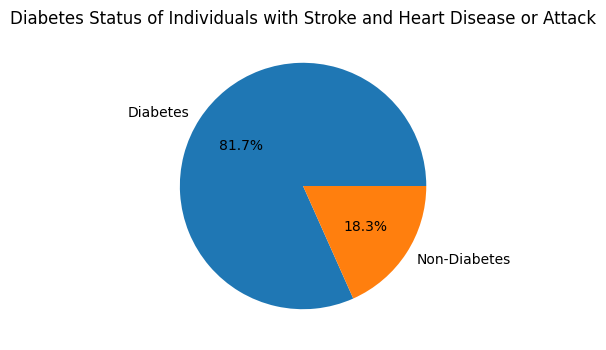

In [21]:
# filtering the df to include only individuals who have both stroke and heart disease or attack
df_stroke_heartdisease = df[(df['Stroke'] == 1) & (df['HeartDiseaseorAttack'] == 1)]

# plotting to identify the how diabetes is effected due to stroke or any heart diseases
grouped = df_stroke_heartdisease['Diabetes_binary'].value_counts()
plt.figure(figsize=(4, 4))
grouped.plot(kind='pie', autopct='%1.1f%%', labels=['Diabetes', 'Non-Diabetes'])
plt.title('Diabetes Status of Individuals with Stroke and Heart Disease or Attack')
plt.xlabel('')
plt.ylabel('')
plt.show()

#### Interpretation:
The pie chart illustrates the diabetes status among individuals who have both stroke and heart disease or attack. It reveals that a significant percentage of these individuals have diabetes, indicating a potential correlation between stroke, heart disease, and diabetes. This suggests a higher likelihood of individuals with stroke or heart disease also having diabetes.

In [22]:
# calculating the correlation matrix
correlation_matrix = df.corr()

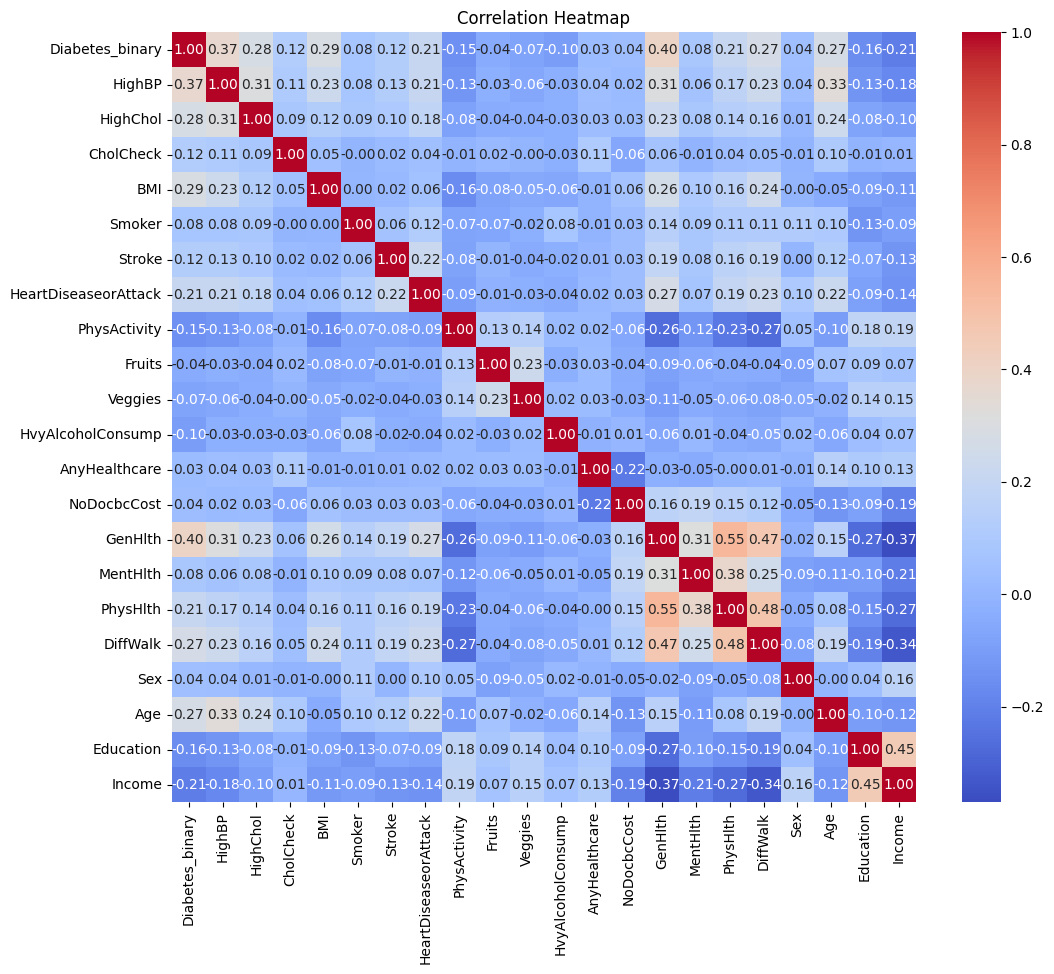

In [23]:
# plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### Interpretation:

In the correlation heatmap values range from -1 to 1, where:
- Values close to 1 indicate a strong positive correlation, meaning that as one variable increases, the other also tends to increase.
- Values close to -1 indicate a strong negative correlation, meaning that as one variable increases, the other tends to decrease.
- Values close to 0 indicate little to no correlation between the variables.

Features with darker shades represent stronger correlations.

<ipython-input-24-befbd34b3f36>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='viridis')


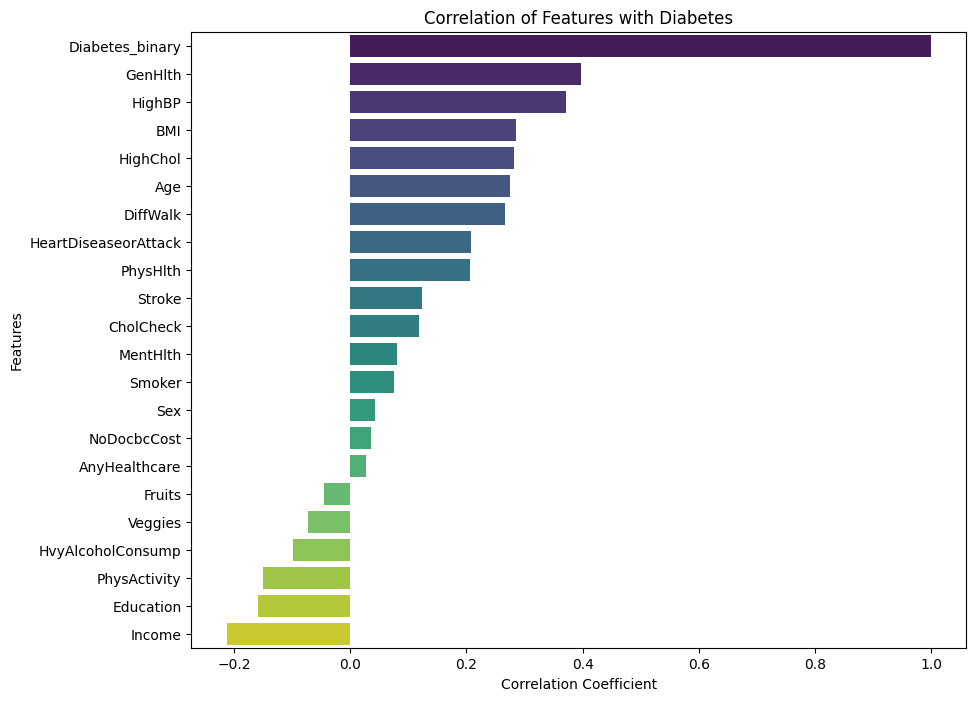

In [24]:
# calculating the correlation coefficients between each feature and the target variable
correlation_with_target = correlation_matrix['Diabetes_binary'].sort_values(ascending=False)

# plotting the correlation coefficients
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='viridis')
plt.title('Correlation of Features with Diabetes')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

#### Interpretation:
The correlation bar plot visualizes the strength and direction of the relationship between each feature and the target variable (Diabetes_binary), with positive coefficients indicating a higher likelihood of diabetes and features closer to |1| having stronger associations with the target.

It is observed from the graph that,
- General health, high blood pressure, BMI, high cholesterol, and age exhibit higher positive correlations with diabetes, suggesting that these factors are more strongly associated with the likelihood of diabetes.
- Conversely, education and income have the lowest correlations with diabetes, indicating weaker associations with the target variable.

In [25]:
# dropping the unnecessary columns
columns_to_drop = ['Income', 'Education', 'NoDocbcCost', 'AnyHealthcare']
df = df.drop(columns=columns_to_drop, inplace=False)

In [26]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0,1,0,1,26,0,0,0,1,0,1,0,3,5,30,0,1,4
1,0,1,1,1,26,1,1,0,0,1,0,0,3,0,0,0,1,12
2,0,0,0,1,26,0,0,0,1,1,1,0,1,0,10,0,1,13
3,0,1,1,1,28,1,0,0,1,1,1,0,3,0,3,0,1,11
4,0,0,0,1,29,1,0,0,1,1,1,0,2,0,0,0,0,8


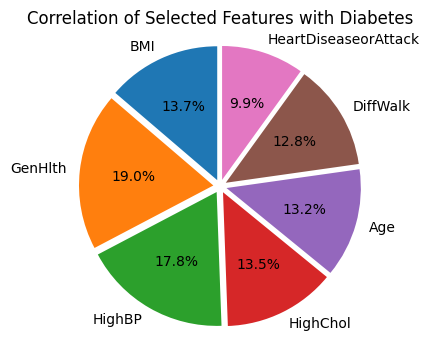

In [27]:
#plotting for selected features
selected_features = ['BMI', 'GenHlth', 'HighBP', 'HighChol', 'Age', 'DiffWalk', 'HeartDiseaseorAttack']
correlation_coefficients = correlation_matrix.loc[selected_features, 'Diabetes_binary']

# converting correlation coefficients to percentages
correlation_percentages = (correlation_coefficients / correlation_coefficients.abs().sum()) * 100
num_features = len(correlation_percentages)

explode = [0.05] * num_features
plt.figure(figsize=(4, 4))
plt.pie(correlation_percentages, labels=correlation_percentages.index, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Correlation of Selected Features with Diabetes')
plt.axis('equal')
plt.show()

### Model Selection

In [28]:
# considering X to contain all the features and y as the target variable
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# training the Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print("Logistic Regression Accuracy:", round(logistic_accuracy,2))
print("Classification Report:")
print(classification_report(y_test, logistic_predictions))

Logistic Regression Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74      6723
           1       0.75      0.77      0.76      7089

    accuracy                           0.75     13812
   macro avg       0.75      0.75      0.75     13812
weighted avg       0.75      0.75      0.75     13812



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# retraining the linear regression model using only the subset of features
selected_features = ['BMI', 'GenHlth', 'HighBP', 'HighChol', 'Age', 'DiffWalk', 'HeartDiseaseorAttack']
X_train_subset = X_train[selected_features]

# initializing and training the logistic regression model with the subset of features
logistic_model_subset = LogisticRegression()
logistic_model_subset.fit(X_train_subset, y_train)

LogisticRegression()

In [31]:
# functions to validate user input

def get_bmi():
    while True:
        try:
            bmi = int(input("Enter BMI: "))
            if 5 <= bmi <= 100:
                return bmi
            else:
                print("BMI should be an integer between 5 and 100.")
        except ValueError:
            print("Invalid input. Please enter an integer.")

def calculate_bmi(weight_lb, height_inches):
    return 703 * (weight_lb / (height_inches ** 2))

def get_weight_height():
    while True:
        try:
            weight_lb = float(input("Enter weight in pounds: "))
            height_in = float(input("Enter height in inches: "))
            bmi = 703 * (weight_lb / (height_in ** 2))
            return bmi
        except ValueError:
            print("Invalid input. Please enter valid weight and height.")


def get_gen_health():
    while True:
        try:
            gen_health = int(input("Enter General Health with scale 1 (excellent) to 5 (poor): "))
            if 1 <= gen_health <= 5:
                return gen_health
            else:
                print("General Health should be an integer between 1 and 5.")
        except ValueError:
            print("Invalid input. Please enter an integer.")

def get_binary_input(prompt):
    while True:
        try:
            value = int(input(prompt))
            if value in [0, 1]:
                return value
            else:
                print("Please enter either 0 or 1.")
        except ValueError:
            print("Invalid input. Please enter either 0 or 1.")

def get_age():
    while True:
        try:
            age = int(input("Enter Age: "))
            if 18 <= age <= 100:
                return age
            else:
                print("Age should be an integer between 18 and 100.")
        except ValueError:
            print("Invalid input. Please enter an integer.")


def convert_age_to_range(age):
    if age < 18:
        return -1  # Invalid
    elif 18 <= age <= 24:
        return 1
    elif 25 <= age <= 29:
        return 2
    elif 30 <= age <= 34:
        return 3
    elif 35 <= age <= 39:
        return 4
    elif 40 <= age <= 44:
        return 5
    elif 45 <= age <= 49:
        return 6
    elif 50 <= age <= 54:
        return 7
    elif 55 <= age <= 59:
        return 8
    elif 60 <= age <= 64:
        return 9
    elif 65 <= age <= 69:
        return 10
    elif 70 <= age <= 74:
        return 11
    elif 75 <= age <= 79:
        return 12
    else:
        return 13


def get_diff_walk():
    while True:
        try:
            diff_walk = int(input("Enter difficulty walking: "))
            if 0 <= diff_walk <= 1:
                return diff_walk
            else:
                print("Difficulty walking should be either 0 or 1.")
        except ValueError:
            print("Invalid input. Please enter either 0 or 1.")

def get_heart_disease_or_attack():
    while True:
        try:
            heart_disease_or_attack = int(input("Enter 1 if you have heart disease or attack, otherwise enter 0: "))
            if heart_disease_or_attack in [0, 1]:
                return heart_disease_or_attack
            else:
                print("Please enter either 0 or 1.")
        except ValueError:
            print("Invalid input. Please enter either 0 or 1.")

def validate_user_input():
    bmi_known = input("Do you know your BMI? (yes/no): ").lower()
    if bmi_known == "yes":
        bmi = get_bmi()
    elif bmi_known == "no":
        weight_lb = float(input("Enter weight in lb: "))
        height_inches = float(input("Enter height in inches: "))
        bmi = calculate_bmi(weight_lb, height_inches)
        print("Calculated BMI:", bmi)
    else:
        print("Invalid input. Please enter 'yes' or 'no'.")
        return validate_user_input()

    gen_health = get_gen_health()
    high_bp = get_binary_input("Enter 1 if you have high blood pressure, otherwise enter 0: ")
    high_chol = get_binary_input("Enter 1 if you have high cholesterol, otherwise enter 0: ")
    age = get_age()
    age = convert_age_to_range(age)
    diff_walk = get_diff_walk()
    heart_disease_or_attack = get_heart_disease_or_attack()

    return bmi, gen_health, high_bp, high_chol, age, diff_walk, heart_disease_or_attack

In [38]:
# collecting user input
bmi, gen_health, high_bp, high_chol, age, diff_walk, heart_disease_or_attack = validate_user_input()
user_data_subset = [[bmi, gen_health, high_bp, high_chol, age, diff_walk, heart_disease_or_attack]]

# using the trained LR model with the subset of features to predict diabetes status
predicted_diabetes_status_subset = logistic_model_subset.predict(user_data_subset)

if predicted_diabetes_status_subset == 1:
    print("Based on the provided information, you might have a chance of diabetes.")
else:
    print("Based on the provided information, you don't have a chance of diabetes.")

Do you know your BMI? (yes/no): yes
Enter BMI: 32
Enter General Health with scale 1 (excellent) to 5 (poor): 3
Enter 1 if you have high blood pressure, otherwise enter 0: 1
Enter 1 if you have high cholesterol, otherwise enter 0: 1
Enter Age: 60
Enter difficulty walking: 1
Enter 1 if you have heart disease or attack, otherwise enter 0: 0
Based on the provided information, you might have a chance of diabetes.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


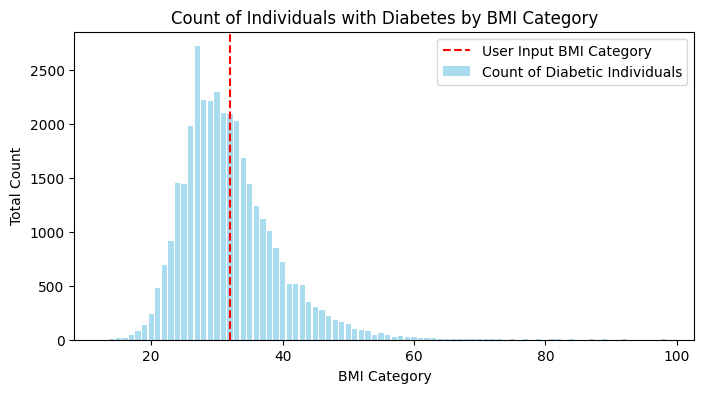

In [39]:
# grouping by BMI category and calculate the count of individuals in each category
bmi_counts = df_positive['BMI'].value_counts().sort_index()

# plotting bar graph
plt.figure(figsize=(8, 4))
plt.bar(bmi_counts.index, bmi_counts.values, color='skyblue', alpha=0.7, label='Count of Diabetic Individuals')

# plotting user input as a line
plt.axvline(x=user_data_subset[0][0], color='red', linestyle='--', label='User Input BMI Category')

plt.title('Count of Individuals with Diabetes by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Total Count')
plt.legend()
plt.show()

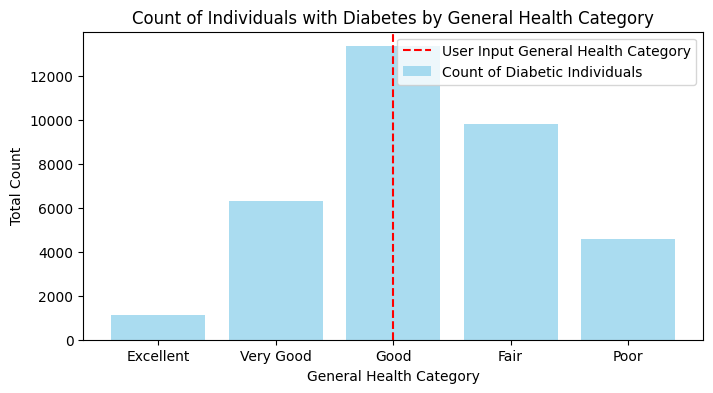

In [40]:
# grouping by General Health category and calculate the count of individuals in each category
gen_health_counts = df_positive['GenHlth'].value_counts().sort_index()

# plotting bar graph
plt.figure(figsize=(8, 4))
plt.bar(gen_health_counts.index, gen_health_counts.values, color='skyblue', alpha=0.7, label='Count of Diabetic Individuals')

# labeling x-axis ticks
plt.xticks(gen_health_counts.index, ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'])

# plotting user input as a line
plt.axvline(x=user_data_subset[0][1], color='red', linestyle='--', label='User Input General Health Category')

plt.title('Count of Individuals with Diabetes by General Health Category')
plt.xlabel('General Health Category')
plt.ylabel('Total Count')
plt.legend()
plt.show()

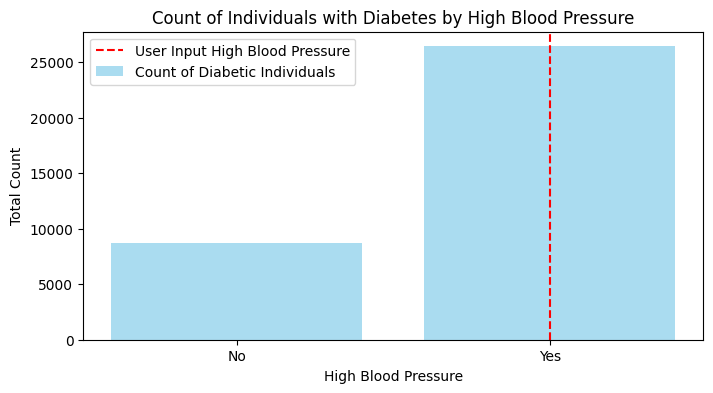

In [41]:
# grouping by HighBP category and calculate the count of individuals in each category
high_bp_counts = df_positive['HighBP'].value_counts().sort_index()

# plotting bar graph
plt.figure(figsize=(8, 4))
plt.bar(high_bp_counts.index, high_bp_counts.values, color='skyblue', alpha=0.7, label='Count of Diabetic Individuals')

# Llbeling x-axis ticks
plt.xticks(high_bp_counts.index, ['No', 'Yes'])

# plotting user input as a line
plt.axvline(x=user_data_subset[0][2], color='red', linestyle='--', label='User Input High Blood Pressure')

plt.title('Count of Individuals with Diabetes by High Blood Pressure')
plt.xlabel('High Blood Pressure')
plt.ylabel('Total Count')
plt.legend()
plt.show()

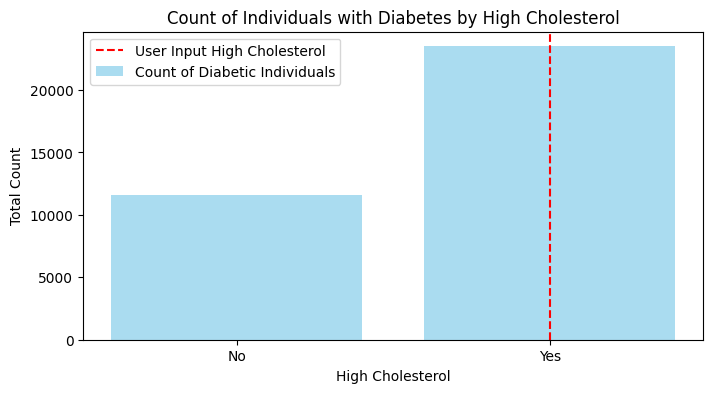

In [42]:
# grouping by HighChol category and calculate the count of individuals in each category
high_chol_counts = df_positive['HighChol'].value_counts().sort_index()

# plotting bar graph
plt.figure(figsize=(8, 4))
plt.bar(high_chol_counts.index, high_chol_counts.values, color='skyblue', alpha=0.7, label='Count of Diabetic Individuals')

# labeling x-axis ticks
plt.xticks(high_chol_counts.index, ['No', 'Yes'])

# plotting user input as a line
plt.axvline(x=user_data_subset[0][3], color='red', linestyle='--', label='User Input High Cholesterol')

plt.title('Count of Individuals with Diabetes by High Cholesterol')
plt.xlabel('High Cholesterol')
plt.ylabel('Total Count')
plt.legend()
plt.show()

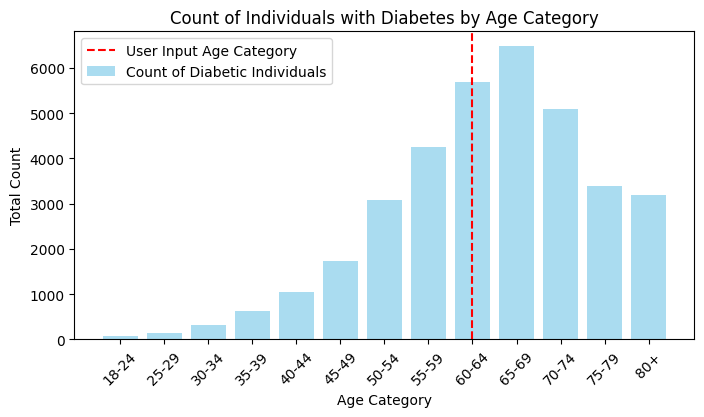

In [43]:
age_counts = df_positive['Age'].value_counts().sort_index()

# plotting bar graph
plt.figure(figsize=(8, 4))
plt.bar(age_counts.index, age_counts.values, color='skyblue', alpha=0.7, label='Count of Diabetic Individuals')

# plotting user input as a line
plt.axvline(x=user_data_subset[0][4], color='red', linestyle='--', label='User Input Age Category')

plt.title('Count of Individuals with Diabetes by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Total Count')
plt.xticks(age_counts.index, ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+'], rotation=45)
plt.legend()
plt.show()